# Example for the tropical rainfall

Build an histogram for ERA5 after having loaded data a couple of configuration files for machines and the specific diagnostic.
Testing also the regridding function

In [17]:
# Temporary hack to access to AQUA regridder
import sys
sys.path.append("../..")
from aqua import regrid

In [18]:
import xarray as xr
import yaml
import dask

diagname = 'tropical-rainfall'
machine = 'wilma'

with open(f'../../config/config_{machine}.yml', 'r', encoding='utf-8') as file:
    config = yaml.load(file, Loader=yaml.FullLoader)

with open(f'{diagname}.yml', 'r', encoding='utf-8') as file:
    namelist = yaml.load(file, Loader=yaml.FullLoader)

infile = config['input'][diagname]
infile

field = xr.open_mfdataset(infile)['tp']
field



Create weights for interpolating on a 1x1 grid with CDO using CDO bindings

In [ ]:
from cdo import *   # python version
cdo = Cdo()
weights = cdo.genycon('r180x90', input = infile, returnXDataset = True)
weights


Apply real regridding from AQUA: quite clumsy due to weird directory structure, but it works

In [ ]:

regridder = regrid.regrid.Regridder(weights=weights)
newfield = regridder.regrid(field)
newfield.load()


Actually the regridder breaks the index of the xarray structure. Indexes for lon and lat are removed. This needs to be addressed, I no longer can produce a selection around the Equator. Slice a couple of years and select only around the Equator as in Watson et al. (2017)

In [ ]:
#field1 = newfield.sel(lat=slice(10,-10))
field2 = newfield.sel(time=slice(str(namelist['year1']),str(namelist['year2'])))
field2

This can be easily improved by using dask.histogram which is much faster.

KeyboardInterrupt: 

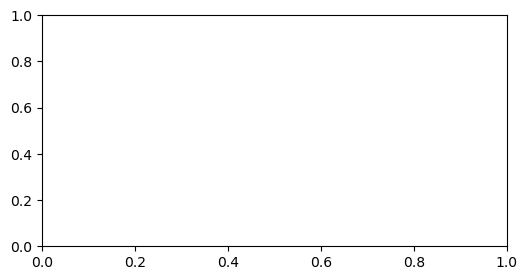

In [15]:
n_bins = 20
field2.plot.hist(bins=n_bins, yscale='log', color="goldenrod", aspect=2, size=3)
